In this notebook different quantisation methods and distance metrics for Facial Recognition will be compared both on accuracy and execution time. 

The Quantisation methods include:
- Scalar Quantisation
- TensorFlow Quantisation

The distance metrics include:
- Cosine Similarity
- Euclidean Distance

Below are the necassary import to run the code.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # suppress tensorflow warnings https://stackoverflow.com/a/40871012
from deepface import DeepFace
import subprocess
import numpy as np
from decimal import Decimal # for proper rounding
import random
import time
import pandas as pd
from datetime import datetime
import struct
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import statistics
import accuracy as ac
import pickle
import quantisations as qt
import basics as bs


# CONSTANTS
EXECUTABLE_PATH = "ABY/build/bin"
INPUT_FILE_NAME = "input_vecs.txt"
EXECUTABLE_NAME_SCENARIO = 'cos_dist_copy'
CMD_SCENARIO = f"./{EXECUTABLE_NAME_SCENARIO} -r 1 -f {INPUT_FILE_NAME} & (./{EXECUTABLE_NAME_SCENARIO} -r 0 -f {INPUT_FILE_NAME} 2>&1 > /dev/null)"

# random number generator
rng = np.random.default_rng()

Below are two functions to compare Facenet and Sface accuracy. One for Euclidean Distance and one for Cosine Similarity. The code to create a visual representation for this comparison is also included.

In [2]:
###### GENERATING THE GLOBAL PAIRS. 
######## we only need to run this once and then we can have the file and use pairs as the list of embeddings 
########## uncomment to use for first them, then use the next cell!

##########!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!##########
## IF U GENERATE A NEW FILE, CHANGE THE NAME!!!! THE EMBEDINGPAIRS.PKL IS THE WORKING ONE AND THE ONE USED!!!!!!!!!!!!!!!!!!!##########
##########!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!##########

# #
# # Generate pairs globally
# def generate_pairs(m):
#     pairs = []
#     for _ in range(m):
#         print(_)
#         n = random.choice([True, False])
#         imga, imgb = bs.get_two_random_images(same_person=n)
#         pairs.append((imga, imgb,n))
#     return pairs

# m = 2000
# pairs = generate_pairs(m)

#File path
file_path = 'embedingpairs.pkl'

# # Delete the file if it exists
# if os.path.exists(file_path):
#     os.remove(file_path)

# # Save pairs to a new file
# with open(file_path, 'wb') as file:
#     pickle.dump(pairs, file)

In [3]:
with open(file_path, 'rb') as file:
    pairs = pickle.load(file)

In [4]:
# Running the comparison functions

##### PERCENTILE
counters_euc,times_euc = ac.compare_accuracies_euc(pairs)
# counters_cos,times_cos = ac.compare_accuracies_cos(pairs)

In [4]:
# Running the comparison functions

#### MAX
counters_euc,times_euc = ac.compare_accuracies_euc(pairs)
# counters_cos,times_cos = ac.compare_accuracies_cos(pairs)

[-1.5752943754196167, 0.7025552988052368, -1.9581100940704346, -0.8982846140861511, 0.6669844388961792, -0.2819212079048157, -0.5396682024002075, 0.3743577301502228, 0.543799102306366, 0.47371217608451843, 0.8478097319602966, 0.09843704104423523, -0.0988694429397583, -1.6035877466201782, 0.05459916964173317, 2.266456127166748, -1.7404719591140747, -0.10955236107110977, -1.0821928977966309, 0.3097730576992035, 2.3026931285858154, 0.6655555963516235, 0.43000712990760803, -0.5765569806098938, 0.13285605609416962, 0.1329089105129242, -0.27137598395347595, -0.5597512722015381, 0.05363932251930237, 1.0820205211639404, -1.9447304010391235, 0.6959593296051025, 0.3583560287952423, 0.708477258682251, 0.3024277687072754, 0.15407533943653107, 0.3989446461200714, -0.36737456917762756, -1.595299482345581, -3.2705440521240234, 0.9965723752975464, 1.4553700685501099, -0.8589357137680054, 0.5415887832641602, -0.4365207254886627, -1.7763218879699707, 1.1378639936447144, -0.6831632852554321, -0.190939664

In [4]:
# Running the comparison functions 

#### TENSORTT
counters_euc,times_euc = ac.compare_accuracies_euc(pairs)
# counters_cos,times_cos = ac.compare_accuracies_cos(pairs)

[-1.5752943754196167, 0.7025552988052368, -1.9581100940704346, -0.8982846140861511, 0.6669844388961792, -0.2819212079048157, -0.5396682024002075, 0.3743577301502228, 0.543799102306366, 0.47371217608451843, 0.8478097319602966, 0.09843704104423523, -0.0988694429397583, -1.6035877466201782, 0.05459916964173317, 2.266456127166748, -1.7404719591140747, -0.10955236107110977, -1.0821928977966309, 0.3097730576992035, 2.3026931285858154, 0.6655555963516235, 0.43000712990760803, -0.5765569806098938, 0.13285605609416962, 0.1329089105129242, -0.27137598395347595, -0.5597512722015381, 0.05363932251930237, 1.0820205211639404, -1.9447304010391235, 0.6959593296051025, 0.3583560287952423, 0.708477258682251, 0.3024277687072754, 0.15407533943653107, 0.3989446461200714, -0.36737456917762756, -1.595299482345581, -3.2705440521240234, 0.9965723752975464, 1.4553700685501099, -0.8589357137680054, 0.5415887832641602, -0.4365207254886627, -1.7763218879699707, 1.1378639936447144, -0.6831632852554321, -0.190939664

In [5]:
counters_euc

{'scalar_quantisation_percentile': {'correct_tensor_facenet': 554,
  'wrong_tensor_facenet': 446,
  'correct_scalar_facenet': 554,
  'wrong_scalar_facenet': 446,
  'correct_noquant_facenet': 542,
  'wrong_noquant_facenet': 458,
  'correct_tensor_sface': 554,
  'wrong_tensor_sface': 446,
  'correct_scalar_sface': 554,
  'wrong_scalar_sface': 446,
  'correct_noquant_sface': 542,
  'wrong_noquant_sface': 458}}

In [4]:
# def extract_results(counters):
#     methods = []
#     correct_sface_euc = []
#     incorrect_sface_euc = []
#     correct_sface_cos = []
#     incorrect_sface_cos = []
#     correct_facenet_euc = []
#     incorrect_facenet_euc = []
#     correct_facenet_cos = []
#     incorrect_facenet_cos = []

#     for method, counts in counters.items():
#         methods.append(method)
#         correct_sface_euc.append(counts['correct_tensor_sface'])
        incorrect_sface_euc.append(counts['wrong_tensor_sface'])
#         correct_sface_cos.append(counts['correct_scalar_sface'])
#         incorrect_sface_cos.append(counts['wrong_scalar_sface'])
#         correct_facenet_euc.append(counts['correct_tensor_facenet'])
#         incorrect_facenet_euc.append(counts['wrong_tensor_facenet'])
#         correct_facenet_cos.append(counts['correct_scalar_facenet'])
#         incorrect_facenet_cos.append(counts['wrong_scalar_facenet'])
    
#     return (methods, correct_sface_euc, incorrect_sface_euc, correct_sface_cos, incorrect_sface_cos, correct_facenet_euc, incorrect_facenet_euc, correct_facenet_cos, incorrect_facenet_cos)

# def visualize_results(methods, correct_sface_euc, incorrect_sface_euc, correct_sface_cos, incorrect_sface_cos, correct_facenet_euc, incorrect_facenet_euc, correct_facenet_cos, incorrect_facenet_cos):
#     n_methods = len(methods)
#     ind = np.arange(n_methods)
#     width = 0.1       

#     fig, ax = plt.subplots(figsize=(20, 12))

#     bar1 = ax.bar(ind - width * 3.5, correct_sface_euc, width, label='Correct Euclidean (SFace)', color='skyblue')
#     bar2 = ax.bar(ind - width * 2.5, incorrect_sface_euc, width, label='Incorrect Euclidean (SFace)', color='palevioletred')
#     bar3 = ax.bar(ind - width * 1.5, correct_sface_cos, width, label='Correct Cosine (SFace)', color='orange')
#     bar4 = ax.bar(ind - width * 0.5, incorrect_sface_cos, width, label='Incorrect Cosine (SFace)', color='purple')
#     bar5 = ax.bar(ind + width * 0.5, correct_facenet_euc, width, label='Correct Euclidean (Facenet)', color='lightgreen')
#     bar6 = ax.bar(ind + width * 1.5, incorrect_facenet_euc, width, label='Incorrect Euclidean (Facenet)', color='blueviolet')
#     bar7 = ax.bar(ind + width * 2.5, correct_facenet_cos, width, label='Correct Cosine (Facenet)', color='lightcoral')
#     bar8 = ax.bar(ind + width * 3.5, incorrect_facenet_cos, width, label='Incorrect Cosine (Facenet)', color='gold')

#     for bars in [bar1, bar2, bar3, bar4, bar5, bar6, bar7, bar8]:
#         for i, bar in enumerate(bars):
#             ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(bar.get_height())), ha='center', va='bottom')

#     ax.set_xlabel('Quantisation Methods')
#     ax.set_ylabel('Values')
#     ax.set_title('Accuracy Comparison of Different Quantisation Methods using SFace and Facenet (Euclidean Distance and Cosine Similarity)')
#     ax.set_xticks(ind)
#     ax.set_xticklabels(methods, rotation=45, ha='right')
#     ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

#     plt.show()

In [5]:
m=1000
# Calculate and print the average execution times
print("Average Execution Times (in seconds):")
for name in times_euc.keys():
    avg_tensor_time_euc = times_euc[name]['tensor_time'] / m  # Assuming m=1000
    avg_scalar_time_euc = times_euc[name]['scalar_time'] / m
    avg_noquant_time_euc = times_euc[name]['noquant_time'] / m
    
    # avg_tensor_time_cos = times_cos[name]['tensor_time'] / m
    # avg_scalar_time_cos = times_cos[name]['scalar_time'] / m
    # avg_noquant_time_cos = times_cos[name]['noquant_time'] / m

    print(f"\nQuantization Method: {name}")
    # print(f"  Total Tensor Time (Euclidean): {times_euc[name]['tensor_time']} seconds")
    # print(f"  Total Scalar Time (Euclidean): {times_euc[name]['scalar_time']} seconds")
    # print(f"  Total NoQuant Time (Euclidean): {times_euc[name]['noquant_time']} seconds")
    print(f"  Average Tensor Time (Euclidean): {avg_tensor_time_euc:.6f} seconds")
    print(f"  Average Scalar Time (Euclidean): {avg_scalar_time_euc:.6f} seconds")
    # print(f"  Average NoQuant Time (Euclidean): {avg_noquant_time_euc:.6f} seconds")
    
    # print(f"  Total Tensor Time (Cosine): {times_cos[name]['tensor_time']} seconds")
    # print(f"  Total Scalar Time (Cosine): {times_cos[name]['scalar_time']} seconds")
    # # print(f"  Total NoQuant Time (Cosine): {times_cos[name]['noquant_time']} seconds")
    # print(f"  Average Tensor Time (Cosine): {avg_tensor_time_cos:.6f} seconds")
    # print(f"  Average Scalar Time (Cosine): {avg_scalar_time_cos:.6f} seconds")
    # print(f"  Average NoQuant Time (Cosine): {avg_noquant_time_cos:.6f} seconds")


Average Execution Times (in seconds):

Quantization Method: scalar_quantisation_percentile
  Average Tensor Time (Euclidean): 0.001887 seconds
  Average Scalar Time (Euclidean): 0.001120 seconds


below will be the functions to compare the execution time of (Facenet, SFace) x (Euclidean, Cosine) X (no quantisation, Tensorflow, scalar)

In [9]:
m=1000
# Calculate and print the average execution times
print("Average Execution Times (in seconds):")
for name in times_euc.keys():
    avg_tensor_time_euc = times_euc[name]['tensor_time'] / m  # Assuming m=1000
    avg_scalar_time_euc = times_euc[name]['scalar_time'] / m
    avg_noquant_time_euc = times_euc[name]['noquant_time'] / m
    
    # avg_tensor_time_cos = times_cos[name]['tensor_time'] / m
    # avg_scalar_time_cos = times_cos[name]['scalar_time'] / m
    # avg_noquant_time_cos = times_cos[name]['noquant_time'] / m

    print(f"\nQuantization Method: {name}")
    # print(f"  Total Tensor Time (Euclidean): {times_euc[name]['tensor_time']} seconds")
    # print(f"  Total Scalar Time (Euclidean): {times_euc[name]['scalar_time']} seconds")
    # print(f"  Total NoQuant Time (Euclidean): {times_euc[name]['noquant_time']} seconds")
    print(f"  Average Tensor Time (Euclidean): {avg_tensor_time_euc:.6f} seconds")
    print(f"  Average Scalar Time (Euclidean): {avg_scalar_time_euc:.6f} seconds")
    # print(f"  Average NoQuant Time (Euclidean): {avg_noquant_time_euc:.6f} seconds")
    
    # print(f"  Total Tensor Time (Cosine): {times_cos[name]['tensor_time']} seconds")
    # print(f"  Total Scalar Time (Cosine): {times_cos[name]['scalar_time']} seconds")
    # # print(f"  Total NoQuant Time (Cosine): {times_cos[name]['noquant_time']} seconds")
    # print(f"  Average Tensor Time (Cosine): {avg_tensor_time_cos:.6f} seconds")
    # print(f"  Average Scalar Time (Cosine): {avg_scalar_time_cos:.6f} seconds")
    # print(f"  Average NoQuant Time (Cosine): {avg_noquant_time_cos:.6f} seconds")


Average Execution Times (in seconds):

Quantization Method: scalar_quantisation_percentile
  Average Tensor Time (Euclidean): 0.001941 seconds
  Average Scalar Time (Euclidean): 0.001112 seconds


In [11]:
counters_euc['scalar_quantisation_tensorrt'] ==counters_euc['scalar_quantisation_max']

KeyError: 'scalar_quantisation_tensorrt'

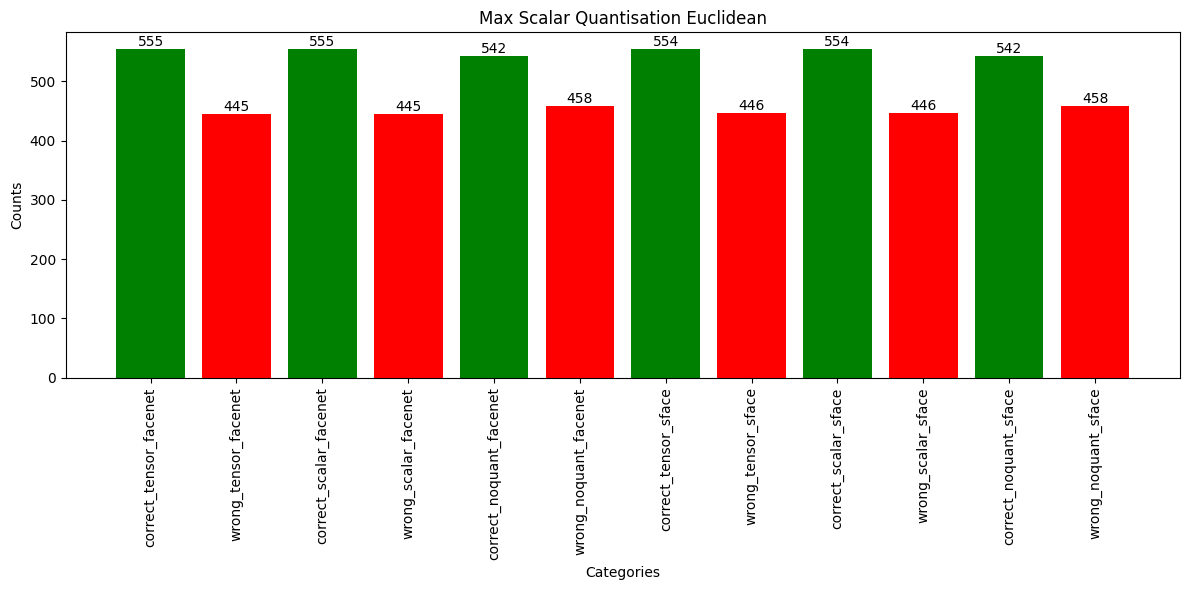

In [8]:
# Extracting keys and values
labels = list(counters_euc['scalar_quantisation_max'].keys())
values = list(counters_euc['scalar_quantisation_max'].values())

# Creating the bar graph
fig, ax = plt.subplots(figsize=(12, 6))
bar_positions = range(len(labels))

# Bar colors based on correctness
bar_colors = ['green' if 'correct' in label else 'red' for label in labels]

# Plot bars
bars = ax.bar(bar_positions, values, color=bar_colors)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height}', 
        ha='center', 
        va='bottom'
    )

# Setting labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Max Scalar Quantisation Euclidean')
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels, rotation=90)

# Displaying the graph
plt.tight_layout()

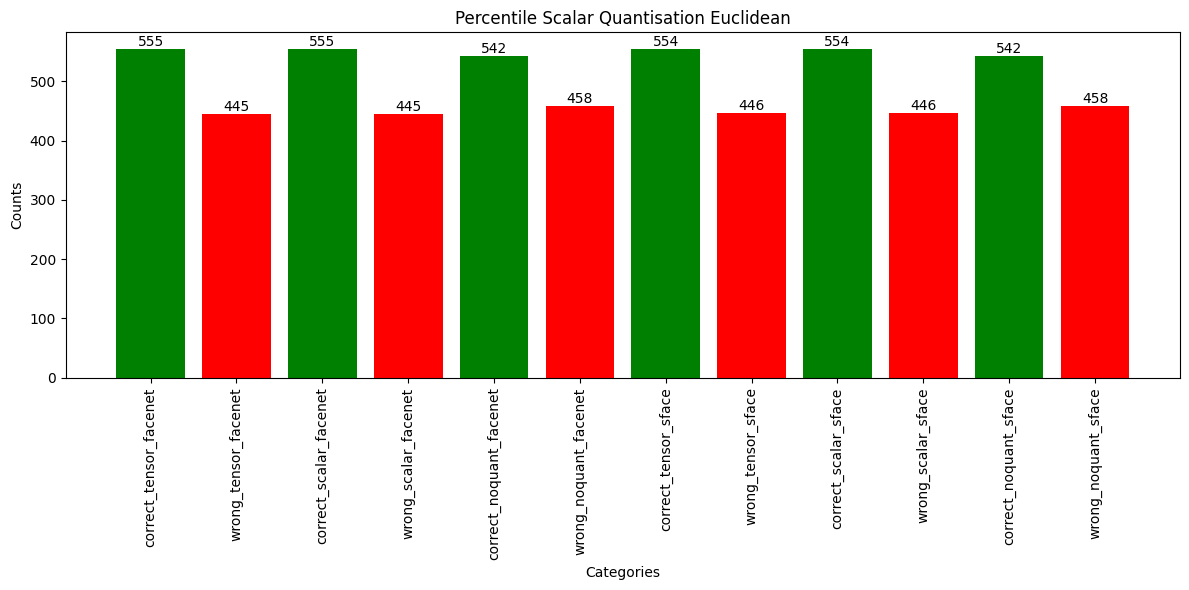

In [6]:
# Extracting keys and values
labels = list(counters_euc['scalar_quantisation_percentile'].keys())
values = list(counters_euc['scalar_quantisation_percentile'].values())

# Creating the bar graph
fig, ax = plt.subplots(figsize=(12, 6))
bar_positions = range(len(labels))

# Bar colors based on correctness
bar_colors = ['green' if 'correct' in label else 'red' for label in labels]

# Plot bars
bars = ax.bar(bar_positions, values, color=bar_colors)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height}', 
        ha='center', 
        va='bottom'
    )

# Setting labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Percentile Scalar Quantisation Euclidean')
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels, rotation=90)

# Displaying the graph
plt.tight_layout()

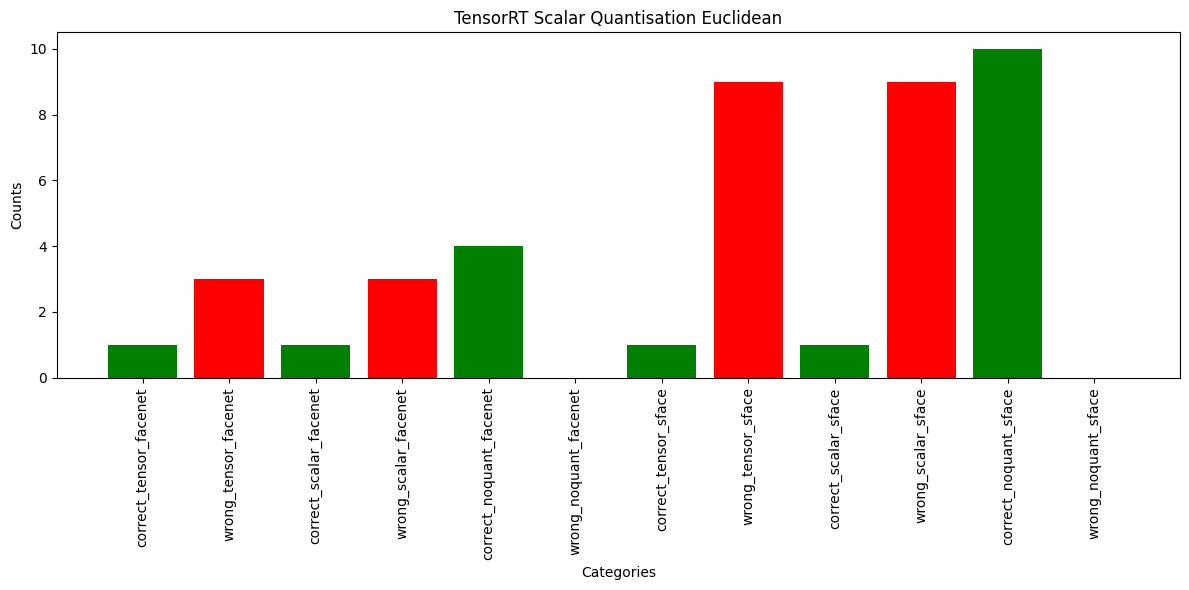

In [11]:
# Extracting keys and values
labels = list(counters_euc['scalar_quantisation_tensorrt'].keys())
values = list(counters_euc['scalar_quantisation_tensorrt'].values())

# Creating the bar graph
fig, ax = plt.subplots(figsize=(12, 6))
bar_positions = range(len(labels))

# Bar colors based on correctness
bar_colors = ['green' if 'correct' in label else 'red' for label in labels]

# Plot bars
ax.bar(bar_positions, values, color=bar_colors)

# Setting labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('TensorRT Scalar Quantisation Euclidean')
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels, rotation=90)

# Displaying the graph
plt.tight_layout()
plt.show()
